In [12]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv('combined_data.csv', index_col=[0]).set_index('game_id')
data.columns

Index(['season', 'round', 'date', 'home_club_id', 'away_club_id',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_name', 'away_club_name',
       'home_club_manager_name', 'away_club_manager_name',
       'home_club_formation', 'away_club_formation', 'referee', 'home_value',
       'away_value', 'home_win', 'away_win', 'draw', 'home_club_cum_goals',
       'away_club_cum_goals', 'home_club_cum_concede', 'away_club_cum_concede',
       'home_total_point', 'away_total_point', 'home_recent_result',
       'away_recent_result', 'result'],
      dtype='object')

In [3]:
# """
# Dropping 
# > # of goals in the game (responsible for directly determining the result of the game)
# > Date --> highly correlational with season / round
# > Club Names --> Name itself would not affect the quality of the model / data
# > Manager Names --> Too many values (126 different values)
# """

# # Add More
# data = data.drop(['date', 
#                   'home_club_id', 
#                   'away_club_id', 
#                   'home_club_goals', 
#                   'away_club_goals', 
#                   'home_club_name', 
#                   'away_club_name', 
#                   'home_club_manager_name', 
#                   'away_club_manager_name', 
#                   'referee', 
#                   'home_club_formation', 
#                   'away_club_formation', 
#                   'home_total_point', 
#                   'away_total_point', 
#                   'home_win', 
#                   'draw', 
#                   'away_win',
#                   'home_value',
#                   'away_value'], axis=1)
# data.columns

Index(['season', 'round', 'home_club_position', 'away_club_position',
       'home_club_cum_goals', 'away_club_cum_goals', 'home_club_cum_concede',
       'away_club_cum_concede', 'home_recent_result', 'away_recent_result',
       'result'],
      dtype='object')

# Miscellaneous

Analysis

In [5]:
# Divide the formation by number of defenders in the formation

data['home_club_formation'].apply(lambda x: x.split('-')[0]).value_counts()

# Divide the formation by number of attackers in the formation

# data['home_club_formation'].apply(lambda x: x.split('-')[-1].split(' ')[0]).value_counts()

home_club_formation
4    3129
3     497
5     174
Name: count, dtype: int64

In [21]:
len(data['away_club_formation'].value_counts())

24

Text(0.5, 0, 'Number of Instances')

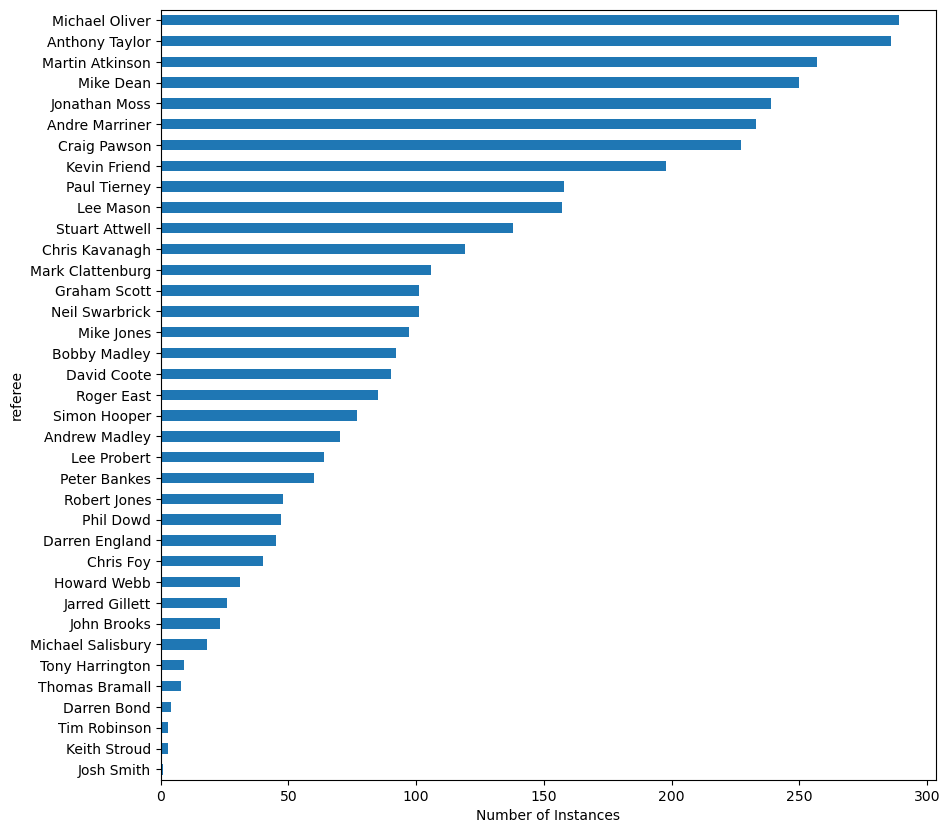

In [6]:
ax = data['referee'].value_counts().sort_values().plot(kind='barh', figsize=(10, 10))
ax.set_xlabel('Number of Instances')

Text(0, 0.5, 'Home Club Formation')

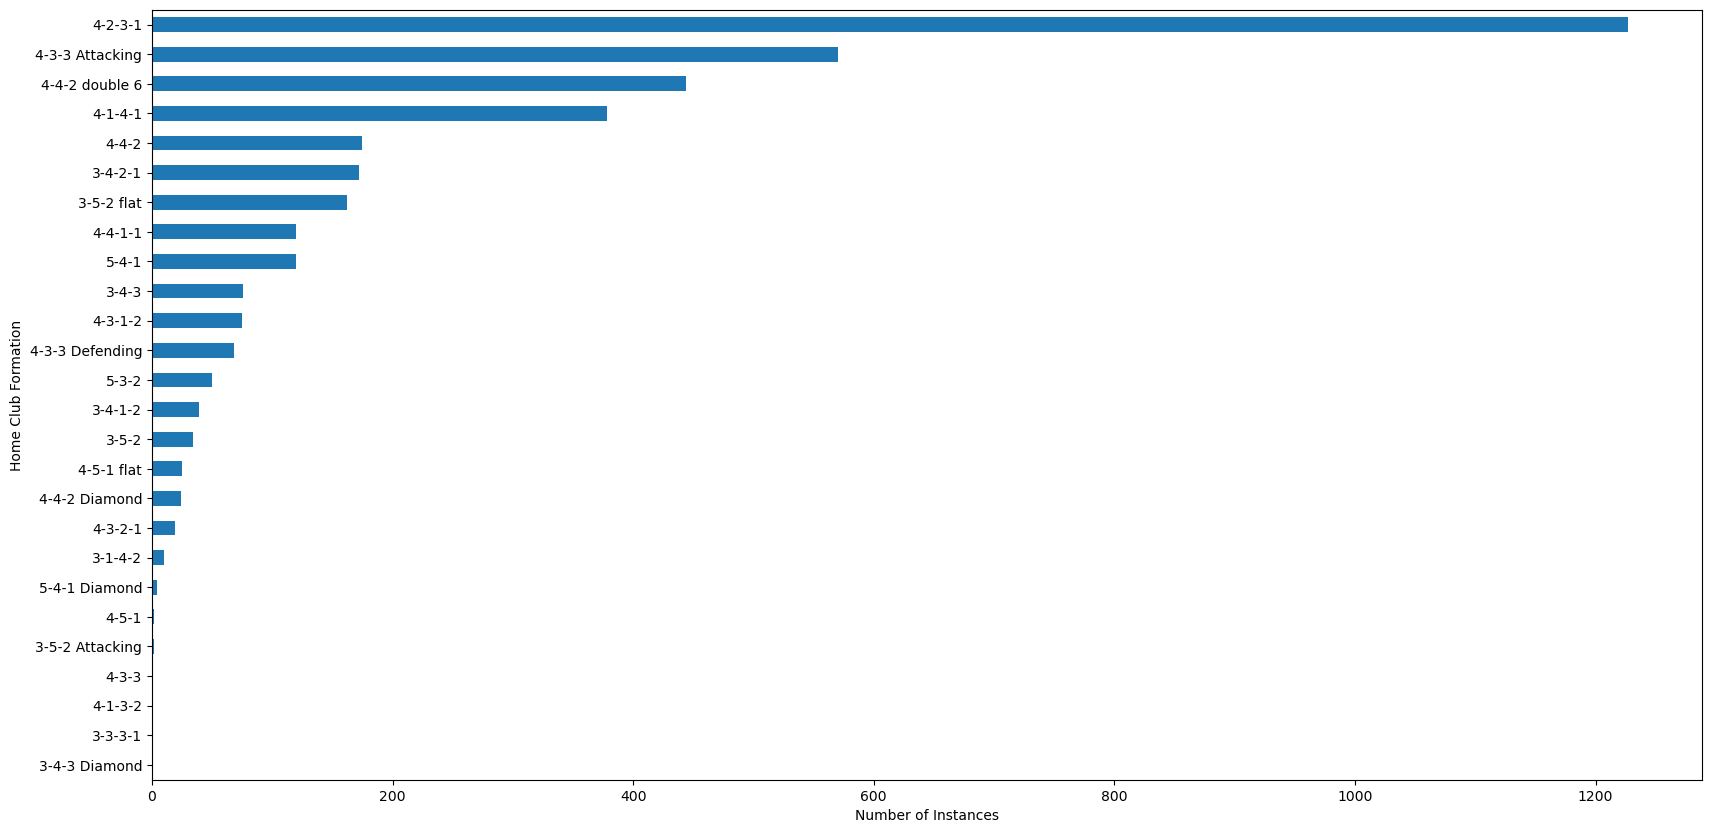

In [9]:
ax = data['home_club_formation'].value_counts().sort_values().plot(kind='barh', figsize=(20, 10))
ax.set_xlabel('Number of Instances')
ax.set_ylabel('Home Club Formation')

Text(0, 0.5, 'Away Club Formation')

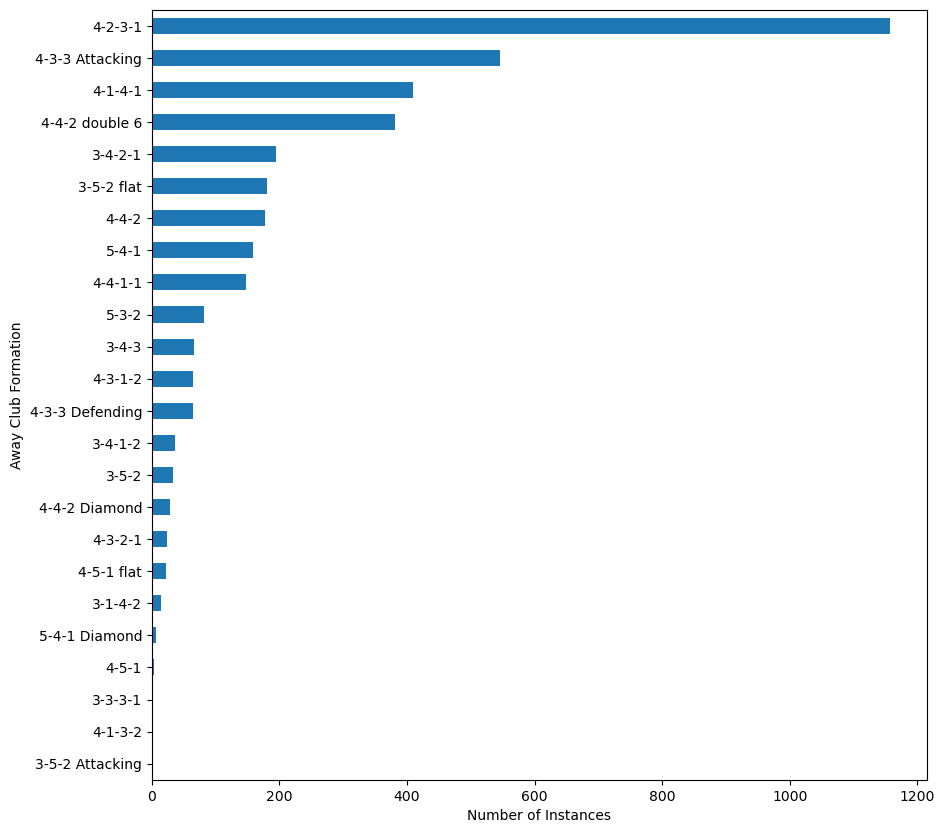

In [10]:
ax = data['away_club_formation'].value_counts().sort_values().plot(kind='barh', figsize=(10, 10))
ax.set_xlabel('Number of Instances')
ax.set_ylabel('Away Club Formation')

In [25]:
data['home_club_manager_name'].value_counts().loc[lambda x: x == 1]

home_club_manager_name
Steve Holland         1
Bruno Saltor          1
Michael Skubala       1
Aaron Danks           1
David Kerslake        1
Mike Stowell          1
Leon Britton          1
Mark Hudson           1
Gary Megson           1
Graeme Jones          1
Jason Tindall         1
Albert Stuivenberg    1
Michael Carrick       1
Name: count, dtype: int64

Text(0, 0.5, 'Home Club Manager Name')

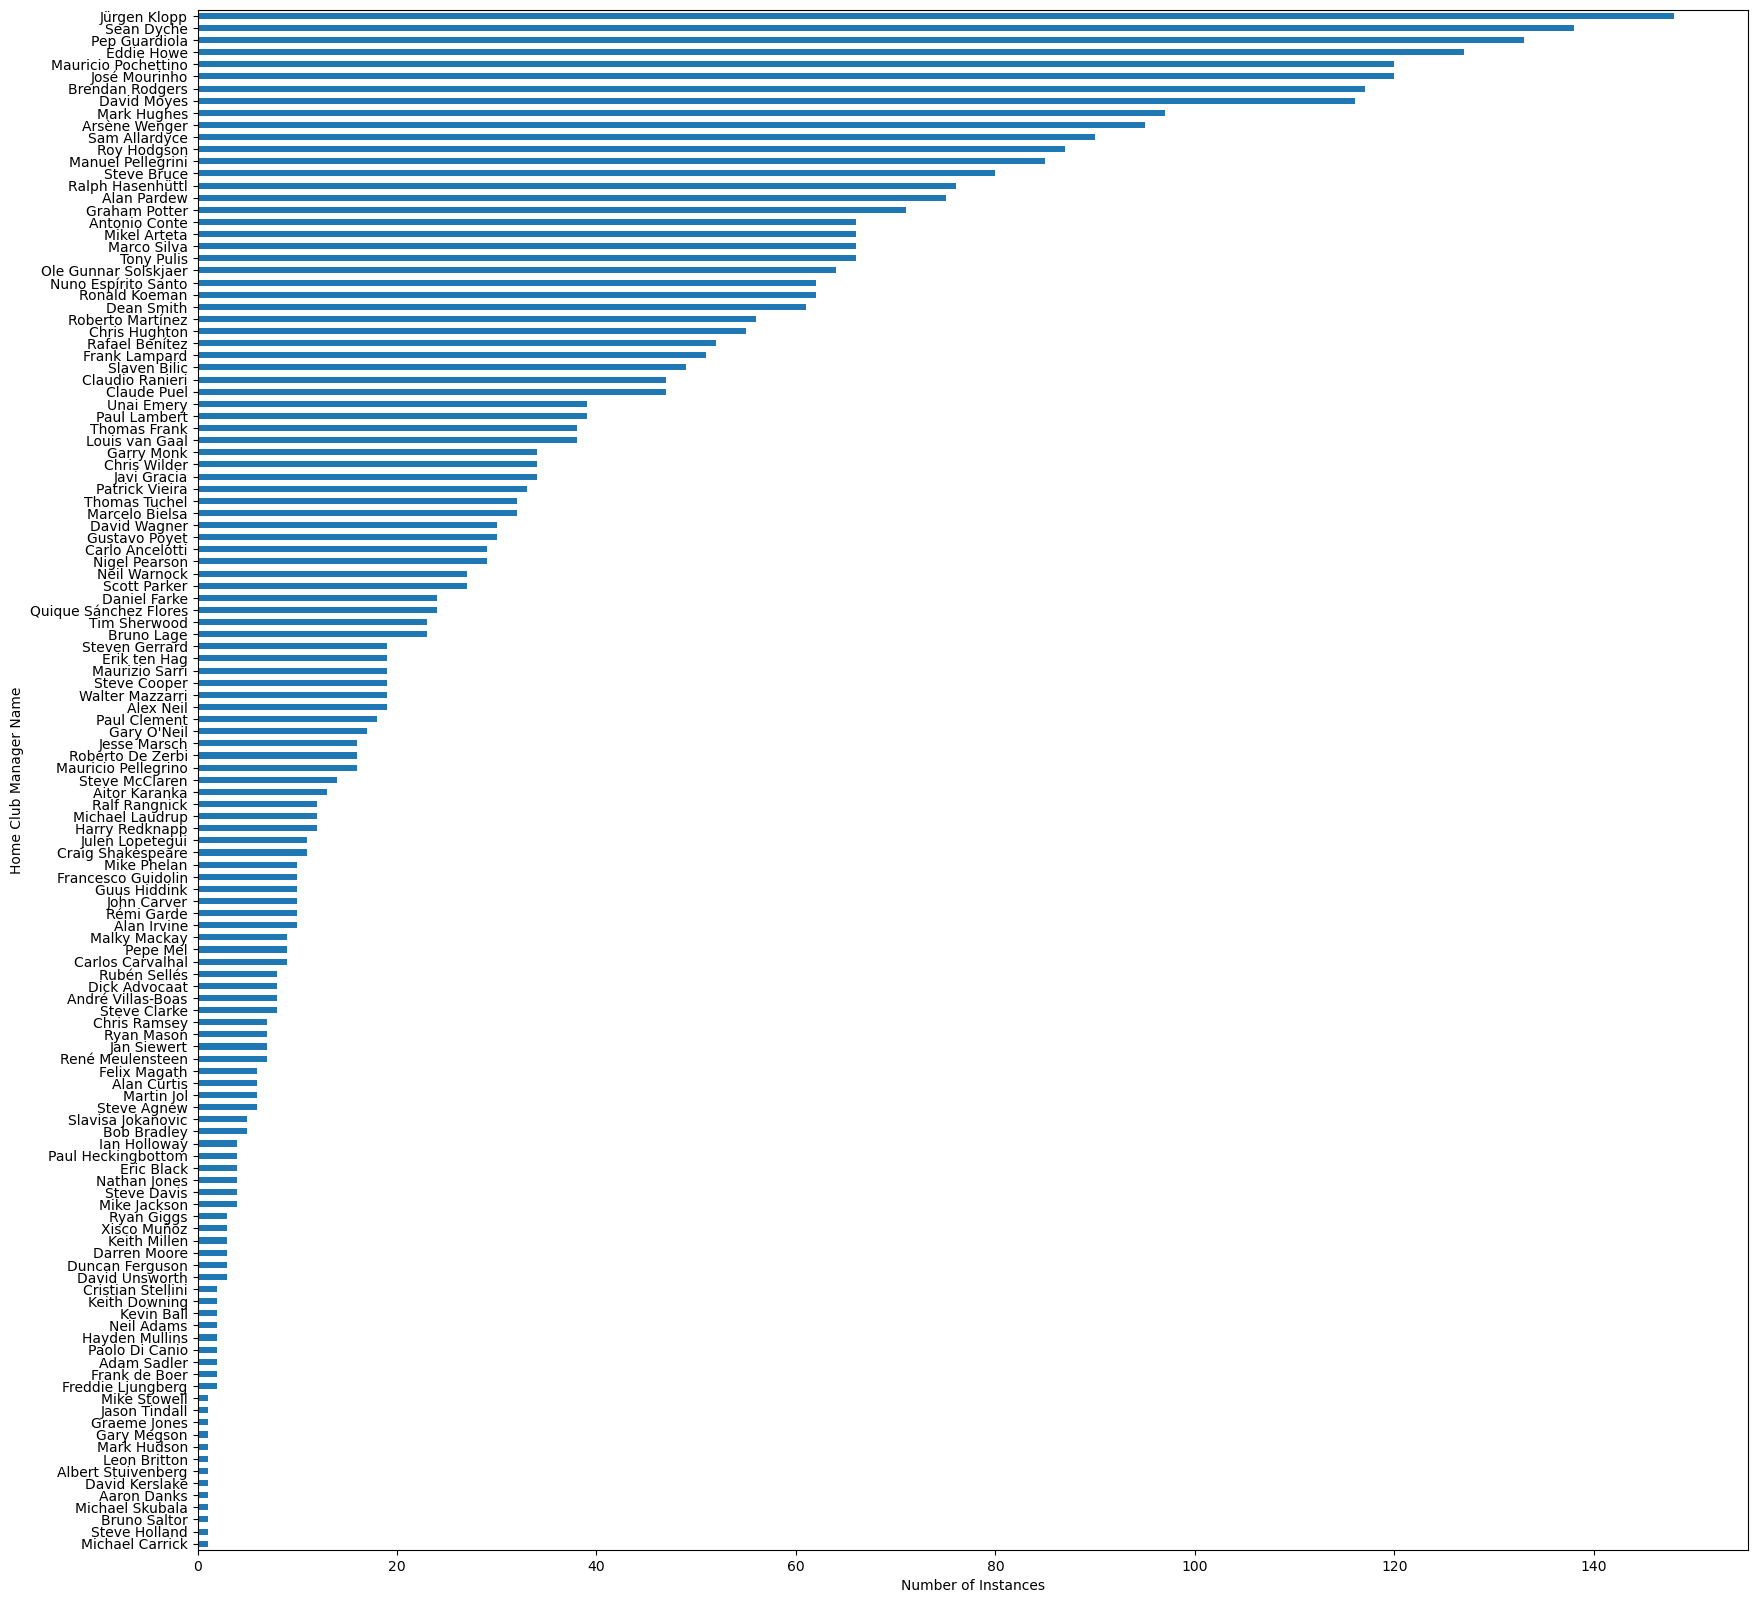

In [12]:
ax = data['home_club_manager_name'].value_counts().sort_values().plot(kind='barh', figsize=(20, 20))
ax.set_xlabel('Number of Instances')
ax.set_ylabel('Home Club Manager Name')

Text(0, 0.5, 'Away Club Manager Name')

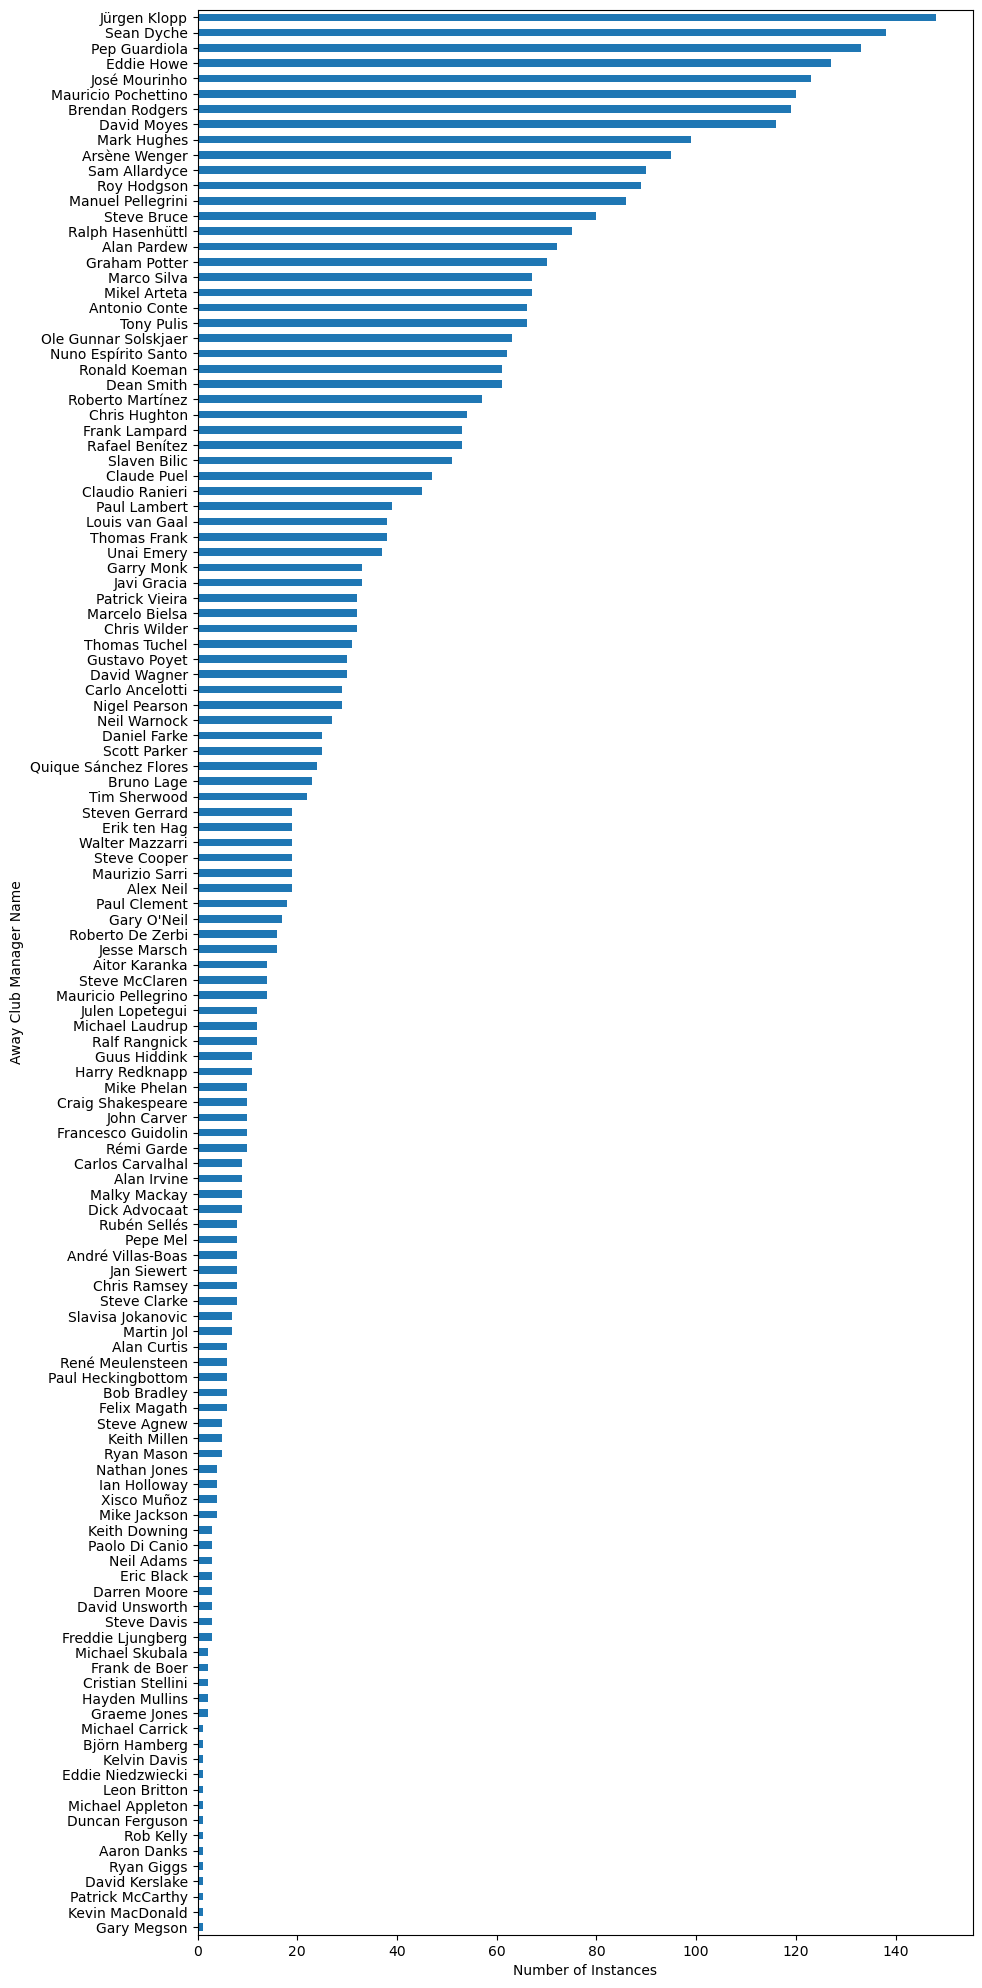

: 

In [ ]:
ax = data['away_club_manager_name'].value_counts().sort_values().plot(kind='barh', figsize=(10, 25))
ax.set_xlabel('Number of Instances')
ax.set_ylabel('Away Club Manager Name')

TypeError: Axes.hist() missing 1 required positional argument: 'x'

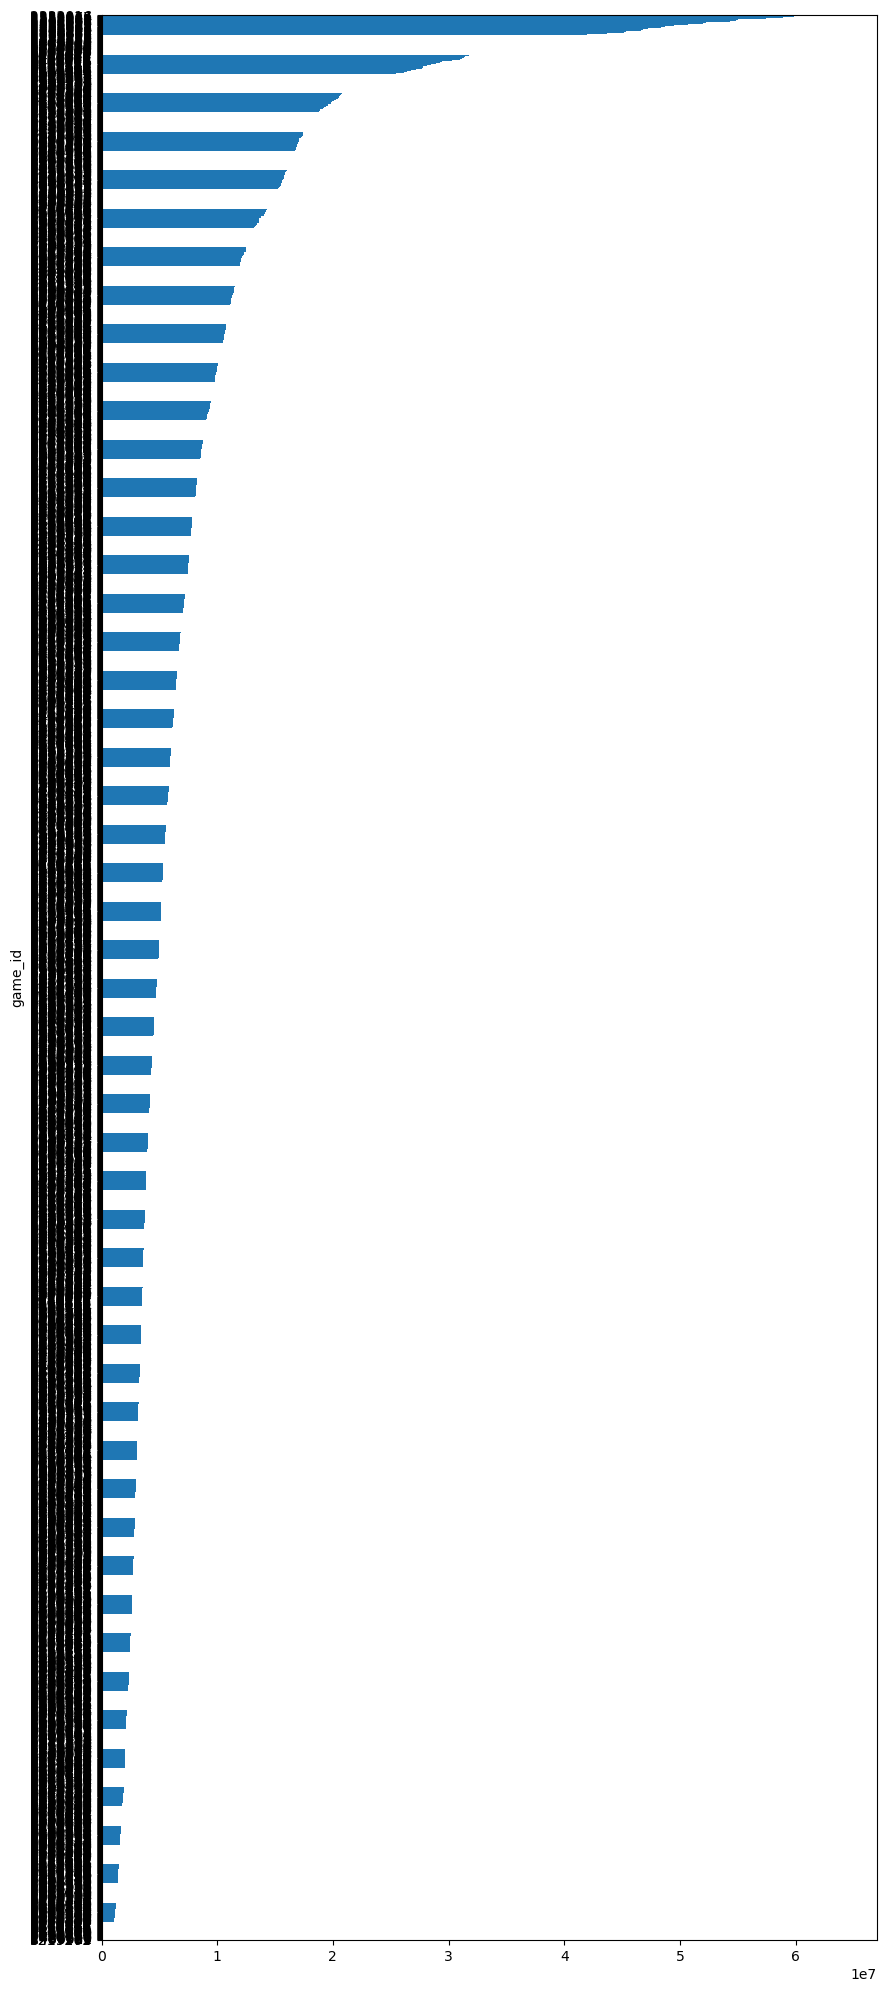

In [ ]:
# ax = data['home_value'].sort_values().plot(kind='barh', figsize=(10, 25)).hist(bins=10, column=['home_value'])
# ax.set_xlabel('Number of Instances')
# ax.set_ylabel('Home Team Starting Lineup Total')

In [ ]:
# ax = data['away_value'].value_counts().sort_values().plot(kind='barh', figsize=(10, 25))
# ax.set_xlabel('Number of Instances')
# ax.set_ylabel('Home Team Starting Lineup Total')

# One-Hot Encoding

One-Hot Encoding for categorial data columns including...
- Formation
- Referee Name

After converting --> Dropping the column(s), automatically done by get_dummies function in pandas lib.

In [ ]:
# # Formation

# data = pd.get_dummies(data, columns=['home_club_formation', 'away_club_formation'])
# data

,season,round,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,referee,home_value,away_value,home_win,...,away_club_formation_4-3-3 Defending,away_club_formation_4-4-1-1,away_club_formation_4-4-2,away_club_formation_4-4-2 Diamond,away_club_formation_4-4-2 double 6,away_club_formation_4-5-1,away_club_formation_4-5-1 flat,away_club_formation_5-3-2,away_club_formation_5-4-1,away_club_formation_5-4-1 Diamond
game_id,,,,,,,,,,,,,,,,,,,,,
2350366,2013,1,5,18,José Mourinho,Steve Bruce,Jonathan Moss,54900000,5250000,0,...,False,False,False,False,False,False,False,False,False,False
2350361,2013,1,11,10,Chris Hughton,Roberto Martínez,Michael Oliver,1500000,7535000,1,...,False,False,False,False,False,False,False,False,False,False
2350365,2013,1,14,7,Ian Holloway,André Villas-Boas,Mark Clattenburg,2725000,3100000,0,...,True,False,False,False,False,False,False,False,False,False
2350367,2013,1,1,20,Manuel Pellegrini,Alan Pardew,Andre Marriner,18200000,9750000,2,...,False,False,False,False,True,False,False,False,False,False
2350359,2013,1,6,13,Brendan Rodgers,Mark Hughes,Martin Atkinson,21550000,7350000,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838596,2022,38,12,4,Frank Lampard,Eddie Howe,Jarred Gillett,18050000,3750000,13,...,False,False,False,False,False,False,False,False,False,False
3838598,2022,38,17,15,Sean Dyche,Gary O'Neil,Stuart Attwell,8450000,2375000,5,...,False,False,False,False,False,False,False,False,False,False
3838594,2022,38,7,6,Unai Emery,Roberto De Zerbi,David Coote,5075000,3825000,4,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# # Referee

# data = pd.get_dummies(data, columns=['referee'])
# data

,season,round,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,home_value,away_value,home_win,away_win,...,referee_Paul Tierney,referee_Peter Bankes,referee_Phil Dowd,referee_Robert Jones,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington
game_id,,,,,,,,,,,,,,,,,,,,,
2350366,2013,1,5,18,José Mourinho,Steve Bruce,54900000,5250000,0,0,...,False,False,False,False,False,False,False,False,False,False
2350361,2013,1,11,10,Chris Hughton,Roberto Martínez,1500000,7535000,1,0,...,False,False,False,False,False,False,False,False,False,False
2350365,2013,1,14,7,Ian Holloway,André Villas-Boas,2725000,3100000,0,0,...,False,False,False,False,False,False,False,False,False,False
2350367,2013,1,1,20,Manuel Pellegrini,Alan Pardew,18200000,9750000,2,0,...,False,False,False,False,False,False,False,False,False,False
2350359,2013,1,6,13,Brendan Rodgers,Mark Hughes,21550000,7350000,0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838596,2022,38,12,4,Frank Lampard,Eddie Howe,18050000,3750000,13,6,...,False,False,False,False,False,False,False,False,False,False
3838598,2022,38,17,15,Sean Dyche,Gary O'Neil,8450000,2375000,5,6,...,False,False,False,False,False,False,True,False,False,False
3838594,2022,38,7,6,Unai Emery,Roberto De Zerbi,5075000,3825000,4,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# # Manager

# data = pd.get_dummies(data, columns=['home_club_manager_name', 'away_club_manager_name'])
# data

KeyError: "None of [Index(['home_club_manager_name', 'away_club_manager_name'], dtype='object')] are in the [columns]"

In [ ]:
data.to_csv('data_for_model.csv')